# 1 - Introduction to Statistics: Distributions, Range, Standard Deviation, and Confidence Intervals

## 1. Measures of Central Variance (Range, Standard Deviation)

First, let's import the libraries we'll need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## 1. Range

The range is the difference in maximum and minimum values in a dataset. It gives us a rough estimate about the spread of the data. 

# $R = \rm{max} - \rm{min}$

Here we import our dataset for NBA player stats in the 2021-2022 regular season. We list some important information, including a sample of the data so that we get a sense of what we are dealing with, and all of the column names

In [4]:
NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

print(np.asarray(NBA_regular_2021.columns), len(NBA_regular_2021.columns))

display(NBA_regular_2021)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS'] 30


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


### column meanings

In case you're not very familiar with NBA stats, here are the meanings of each column:

#### Rk: ID
#### Player: player name
#### Pos: position
#### Age: player age
#### Tm: team
#### G: games
#### GS: games started
#### MP: minutes played
#### FG: field goals made - the combined total number of two-point and three-point baskets scored by a player or team (not the same as points scored)
#### FGA: field goals attempted
#### FG%: field goal percentage
#### 3P: 3-pointers made - the total number of 3-point shots made
#### 3PA: 3-pointers attempted
#### 3P%: 3-point percentage
#### 2P: 2-pointers made - the total number of 2-point shots made
#### 2PA: 2-pointers attempted
#### 2P%: 2-point percentage
#### eFG%: effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
#### FT: free-throws made - the total number of free-throws made
#### FTA: free-throws attempted
#### FT%: free-throw precentage
#### ORB: offensive rebounds - the total number of rebounds collected by a player or team while playing offense
#### DRB: defensive rebounds - the total number of rebounds collected by a player or team while playing defense
#### TRB: total rebounds
#### AST: assists
#### STL: steals
#### BLK: blocks
#### TOV: turnovers (losing the ball to the other team before making a shot)
#### PF: personal fouls - the total number of personal fouls commited by the player
#### PTS: points scored

### Example: Find the range of ages in NBA players

In [5]:
MaxAge=np.max(NBA_regular_2021['Age'])
MinAge=np.min(NBA_regular_2021['Age'])

AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players (2021): ", AgeRange)

Range of Ages of NBA players (2021):  22


### Example: Find the player with the max and min ages

You can also find the player with the lowest and highest Age for this season using the pandas `.idxmin()` and `.idxmax()` functions along with the `.loc` function which locates the entries in the datafram with those indexes

In [6]:
#First, find the index corresponding to the youngest and oldest player(s)
youngest_index = NBA_regular_2021['Age'].idxmin()
oldest_index = NBA_regular_2021['Age'].idxmax()

#Then, use .loc to locate the players with that index in the dataframe
#This creates new (small) dataframes for the youngest and oldest players, 
#which you can access like regular dataframes
youngest_player = NBA_regular_2021.loc[youngest_index]
oldest_player = NBA_regular_2021.loc[oldest_index]

#Print the information about the youngest and oldest player - the 'Player' key gives us their names
print("Youngest player in NBA regular season (2021): %s, Age: %s" %(youngest_player['Player'], youngest_player['Age']))
print("Oldest player in NBA regular season (2021): %s, Age: %s" %(oldest_player['Player'], oldest_player['Age']))

Youngest player in NBA regular season (2021): Usman Garuba, Age: 19
Oldest player in NBA regular season (2021): Udonis Haslem, Age: 41


## 2. Standard Deviation
The standard deviation tells us how spread out the numbers in a dataset are from the average (mean). We calculate it with the forumlae:

### for an entire population
## $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 }$

### for a sample of a population
## $s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }$


We can use the std() function in pandas to find the standard deviation. By default it assumes that you are finding the standard deviation of a sample of a population, which is the safer bet if you are looking at a smaller number of players in the NBA. If you want to change it, you can change the `ddof` value, which controls how much we subtract from the denominator.

In [7]:
#Use pandas to find the standard deviation of the ages in NBA Player Ages for the regular season 
#We set ddof=0 to use the formula for an entire population!
Age_sigma=NBA_regular_2021['Age'].std(ddof=0)

print("Standard deviation of NBA player ages (2021): ", Age_sigma)

Standard deviation of NBA player ages (2021):  4.057139238521085


Let's visualize this distribution along with the mean

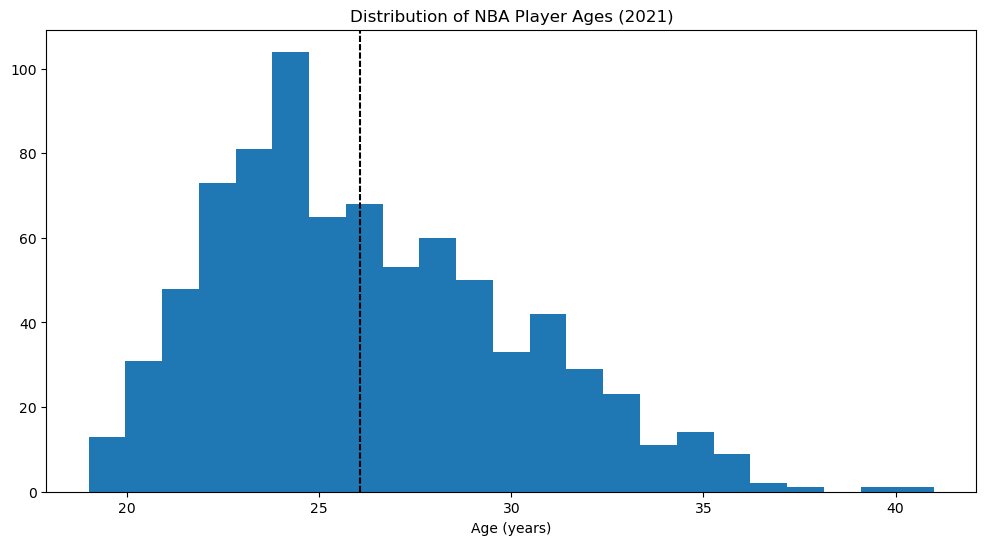

In [8]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23)
plt.axvline(AverageAge, color='black', dashes=[3,1])
plt.show()

## 3. Confidence intervals

Confidence intervals give us a range where we think the true average is.

For data that falls in a **normal distribution**, the standard deviation can inform us about how much data falls within each confidence interval
- First confidence interval: 68% of the data falls within 1 standard deviation of the mean
- Second confidence interval: 95% of the data falls within 2 standard deviations of the mean
- Third confidence interval: 99.7% of the data falls within 3 standard deviations of the mean

Now let's visualize the standard deviation and confidence intervals, to get a sense of the spread in the data

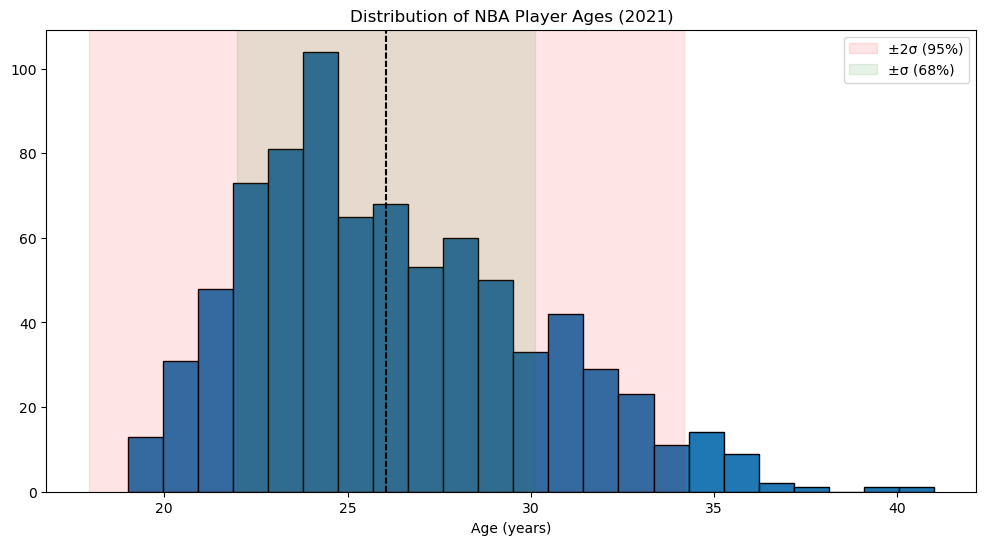

In [9]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23, edgecolor='black')
plt.axvline(AverageAge, color='black', dashes=[3,1])

plt.axvspan(AverageAge-2*Age_sigma, AverageAge+2*Age_sigma, 0, color='red', alpha=0.1, label='±2σ (95%)')
plt.axvspan(AverageAge-Age_sigma, AverageAge+Age_sigma, 0, color='green', alpha=0.1, label='±σ (68%)')

plt.legend()

plt.show()

### 🔍 EXERCISE 1: Find the range of NBA player Ages for the 2022 and 2023 regular seasons and playoff seasons. 

### Do the ranges change much? 

### If there is a difference in Age Ranges between years and regular vs playoff season, why do you think that is?

In [14]:
NBA_regular_2022 =pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

import pandas as pd
import numpy as np

# Load the datasets
NBA_regular_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')
NBA_playoffs_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Playoffs.csv', engine='python', delimiter=';', encoding='latin-1')

In [16]:
# Open data set 
NBA_regular_2022

#Find the Min and age
MaxAge=np.max(NBA_regular_2022['Age'])
MinAge=np.min(NBA_regular_2022['Age'])

#Finding the rage
AgeRange = MaxAge - MinAge 

print("Range of Ages of NBA Players (2022): ", AgeRange) 

Range of Ages of NBA Players (2022):  23


In [17]:
NBA_playoffs_2022

#Find the Min and Max Age 
MaxAge=np.max(NBA_playoffs_2022['Age'])
MinAge=np.min(NBA_playoffs_2022['Age'])

#Find the rnage 
AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players (2022): ", AgeRange)


Range of Ages of NBA players (2022):  23


### 🔍 EXERCISE 2: Find the standard deviation for NBA Player Ages in the 2022 Regular and Playoff seasons.

### What value of `ddof` should you use depending on the kind of season you are looking at?

In [18]:
# For 2022 Regular Season
Age_sigma = NBA_regular_2022['Age'].std(ddof=0)
print("Standard deviation of NBA player ages (2022 Regular Season): ", Age_sigma)

# For 2022 Playoffs
Age_sigma = NBA_playoffs_2022['Age'].std(ddof=0)
print("Standard deviation of NBA player ages (2022 Playoffs): ", Age_sigma)

Standard deviation of NBA player ages (2022 Regular Season):  4.322522850256088
Standard deviation of NBA player ages (2022 Playoffs):  4.392307055902796


To calculate the standard deviation of NBA player ages for the 2022 Regular and Playoff seasons, I need to decide whether I am treating my data as the entire population or as a sample. If I consider my dataset to include all NBA players who participated in the season, I should use ddof=0, because this applies the population standard deviation formula that divides by n. If I think the dataset represents only a subset or sample of all possible players, I should use ddof=1, which applies the sample standard deviation formula and divides by n – 1 to correct for bias. In this case, since I am analyzing all players in the NBA for that season, it is appropriate for me to use ddof=0.

### 🔍 EXERCISE 3: Play around with and visualize different stats for the 2021 Regular season NBA dataset (make histograms for different stats) 

### look for variables that have something close to a normal distribution - which ones can you find that fit this criterion. Why do you think that is?

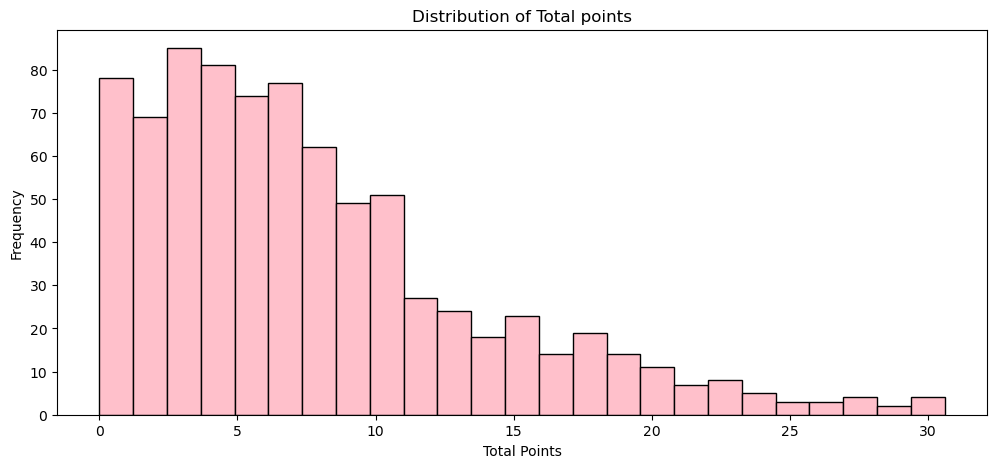

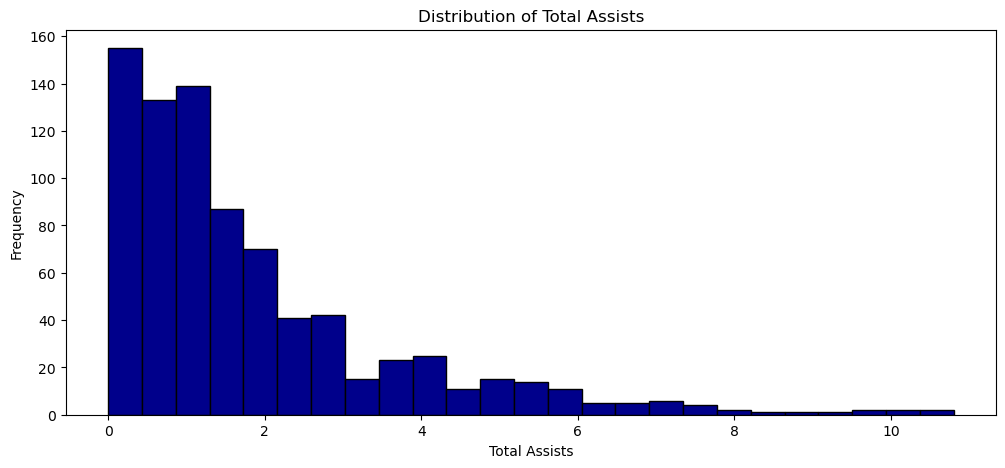

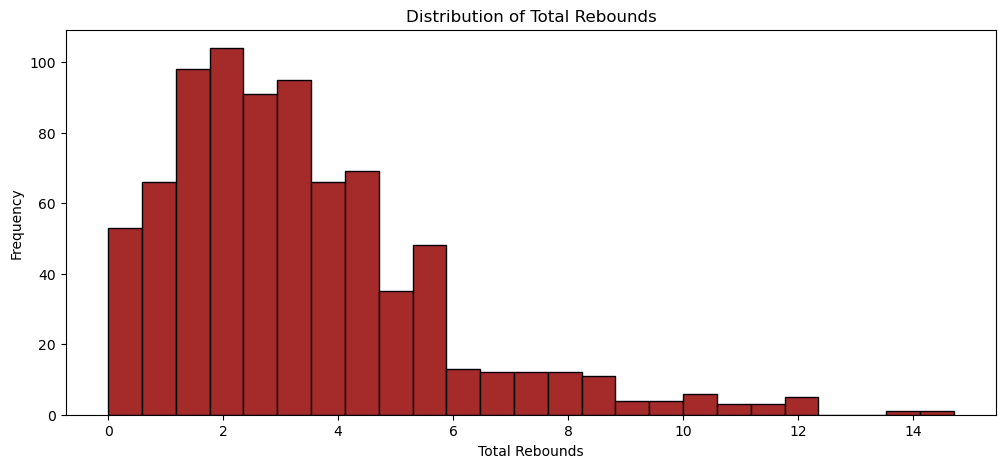

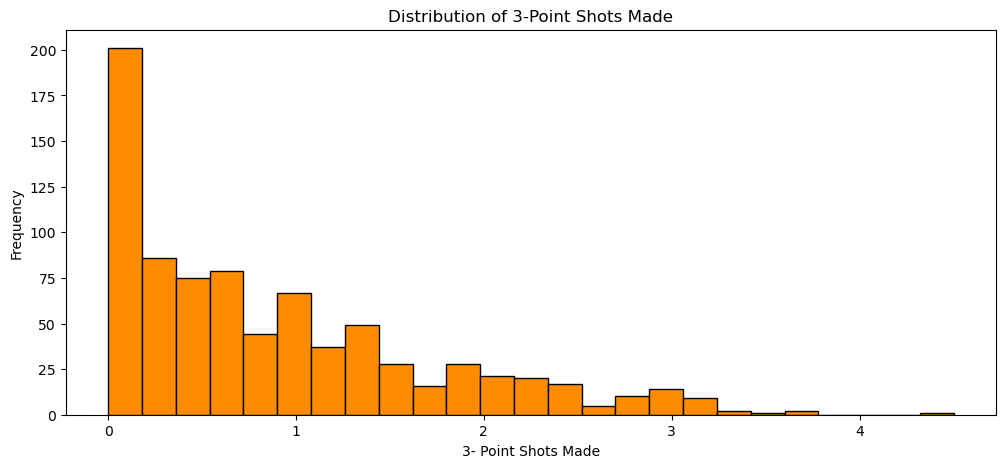

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 5))
plt.hist(NBA_regular_2021['PTS'], bins=25, color='pink', edgecolor='black')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.title('Distribution of Total points')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['AST'], bins=25, color='darkblue', edgecolor='black')
plt.xlabel('Total Assists')
plt.ylabel('Frequency')
plt.title('Distribution of Total Assists')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['TRB'], bins=25,color='brown', edgecolor='black')
plt.xlabel('Total Rebounds')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rebounds')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['3P'], bins=25, color='darkorange', edgecolor='black')
plt.xlabel('3- Point Shots Made')
plt.ylabel('Frequency')
plt.title('Distribution of 3-Point Shots Made')
plt.show()

### 🔍 EXERCISE 4: Find the standard deviation of the data you chose

In [31]:
#Finding the Standard Deviation of the Total Amount of Points 
PTS_std= NBA_regular_2021['PTS'].std(ddof=0)
print("Standard deviation of Total Points:", PTS_std)

#Finding the Standard Deviation of Total Assists
AST_std = NBA_regular_2021['AST'].std(ddof=0)
print("Standard deviation of total Assists:", AST_std)

#Finding the Standard Deviation of Total Rebounds
TRB_std = NBA_regular_2021['TRB'].std(ddof=0)
print("Standard devitation of Total Rebounds:", TRB_std)

#Standard Deviation of 3-point shots made 
ThreeP_std = NBA_regular_2021['3P'].std(ddof=0)
print("Standar deviation of 3-Point Shots Made:", ThreeP_std)

Standard deviation of Total Points: 6.134295938812184
Standard deviation of total Assists: 1.8369479388339134
Standard devitation of Total Rebounds: 2.351369108743694
Standar deviation of 3-Point Shots Made: 0.8414166861456512


### 🔍 EXERCISE 5: On your histogram, visualize the mean of the population with a vertical line

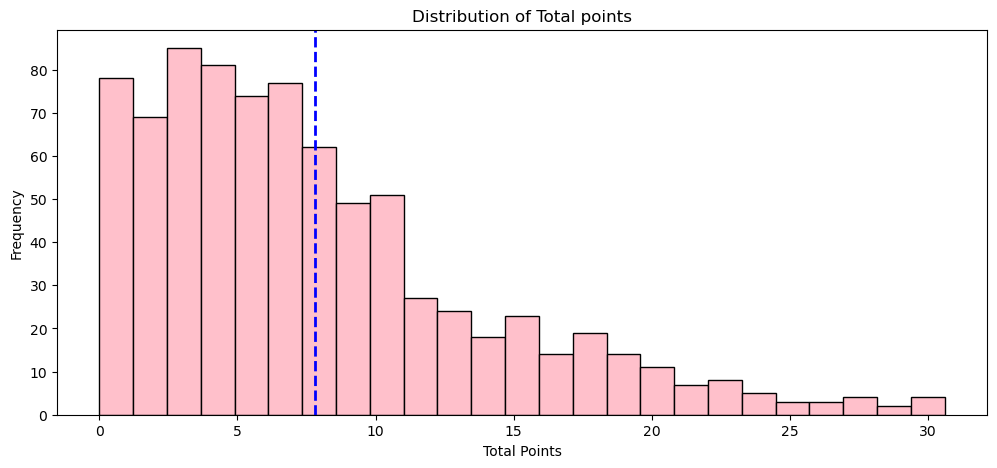

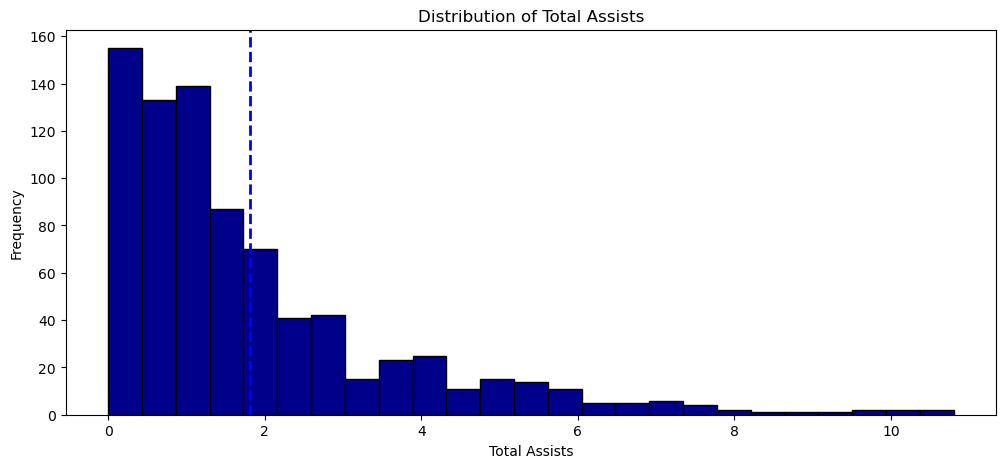

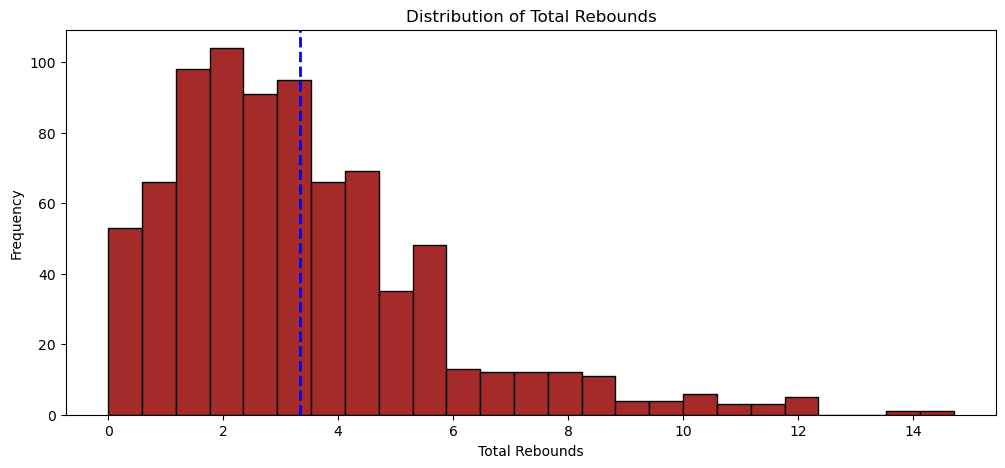

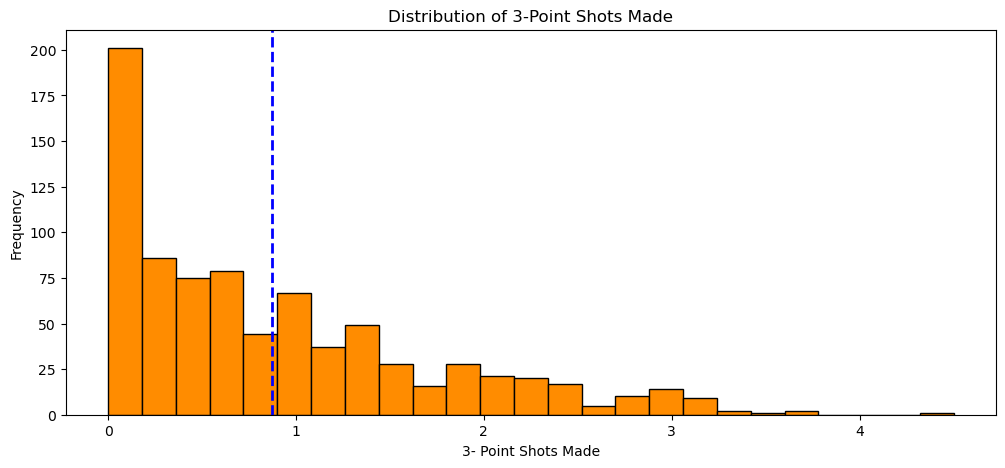

In [36]:
import matplotlib.pyplot as plt 

# Adding the vertical line to Total Points
mean_pts= NBA_regular_2021 ['PTS'].mean()
plt.figure(figsize=(12, 5))
plt.hist(NBA_regular_2021['PTS'], bins=25, color='pink', edgecolor='black')
plt.axvline(mean_pts, # The x coordinate where the vertical line will be drawn (the mean)
            color='blue', # Color of the line
            linestyle='dashed', #Line style 
            linewidth=2, #Line thinkness 
            label=f'Mean = {mean_pts:.2f}')
            # f'Mean =[mean_pts:.2f}' is considered a formatted string:
            # f'' Tells python this is a f string: 
            #{mean_points} Inserts the value of mean_pts
            #:.2f Formats the number as a float with 2 decimal places 
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.title('Distribution of Total points')
plt.show()

#Total Assits
mean_ast= NBA_regular_2021['AST'].mean()
plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['AST'], bins=25, color='darkblue', edgecolor='black')
plt.axvline(mean_ast, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean_ast:.2f}')
plt.xlabel('Total Assists')
plt.ylabel('Frequency')
plt.title('Distribution of Total Assists')
plt.show()

#Total Rebounds 
mean_trb = NBA_regular_2021['TRB'].mean()
plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['TRB'], bins=25,color='brown', edgecolor='black')
plt.axvline(mean_trb, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean_trb:.2f}')
plt.xlabel('Total Rebounds')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rebounds')
plt.show()

#3 Point Shots made
mean_3p= NBA_regular_2021['3P'].mean()
plt.figure(figsize=(12,5))
plt.hist(NBA_regular_2021['3P'], bins=25, color='darkorange', edgecolor='black')
plt.axvline(mean_3p, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean_3p:.2f}')
plt.xlabel('3-Point Shots Made')
plt.xlabel('3- Point Shots Made')
plt.ylabel('Frequency')
plt.title('Distribution of 3-Point Shots Made')
plt.show()

### 🔍 EXERCISE 6: visualize the 1$\sigma$ and 2$\sigma$ confidence intervals on this histogram - what can you say about the confidence intervals? What percentage of the data can you expect to find within each interval?

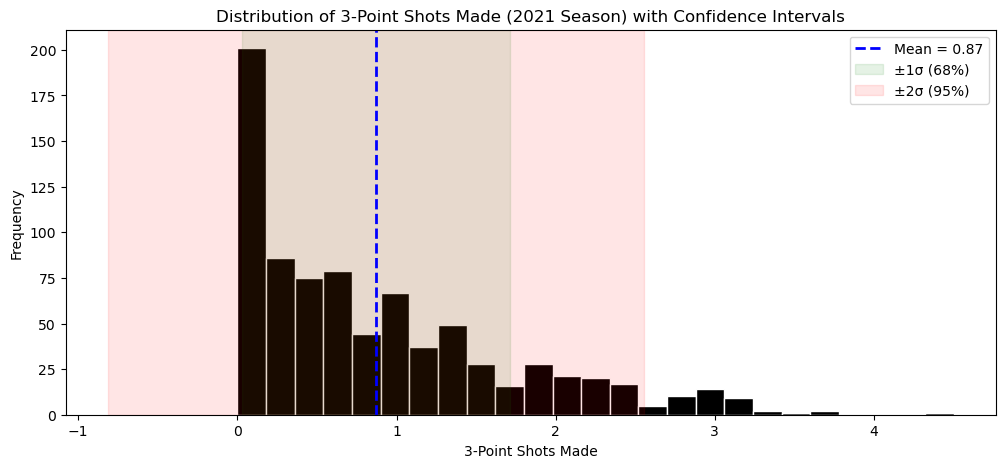

In [37]:
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation
mean_3p = NBA_regular_2021['3P'].mean()
std_3p = NBA_regular_2021['3P'].std(ddof=0)

# Create the histogram
plt.figure(figsize=(12, 5))
plt.hist(NBA_regular_2021['3P'], bins=25, color='black', edgecolor='white')

# Draw the mean line
plt.axvline(mean_3p, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean_3p:.2f}')

# Shade the ±1σ interval (68%)
plt.axvspan(
    mean_3p - std_3p,   # Start of 1σ
    mean_3p + std_3p,   # End of 1σ
    color='green',
    alpha=0.1,
    label='±1σ (68%)'
)

# Shade the ±2σ interval (95%)
plt.axvspan(
    mean_3p - 2*std_3p,   # Start of 2σ
    mean_3p + 2*std_3p,   # End of 2σ
    color='red',
    alpha=0.1,
    label='±2σ (95%)'
)

plt.xlabel('3-Point Shots Made')
plt.ylabel('Frequency')
plt.title('Distribution of 3-Point Shots Made (2021 Season) with Confidence Intervals')
plt.legend()
plt.show()

### BONUS CONTENT

### 🔍 EXERCISE 7: Choose three NBA stats of interest. Find the player in each season (including playoff seasons) with the lowest and highest value in that stat

### Search the internet for the MVP of each season. Does he appear in your list of players for the stats you considered?

### What other information can you show about these players?

### 🔍 EXERCISE 8: Choose a single NBA stat and find the mean and standard deviation for it for a single season. 

### Which players fall outside of the 2$\sigma$ confidence interval (in other words, which players have stats lower or higher than $\bar{x} \pm 2\sigma$)?

### What percentage of the data do these players represent? (remember that everyone *inside* of the 2$\sigma$ interval represent 95% of the data - these players fall *outside* of that). Can we consider these players outliers? Why?